In [2]:
pip install scikit-learn==1.3.2

  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.3 MB 840.2 kB/s eta 0:00:11
   -- ------------------------------------- 0.5/9.3 MB 840.2 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/9.3 MB 932.9 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/9.3 MB 932.9 kB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.3 MB 932.9 kB/s eta 0:00:09
   ----- ---------------------------------- 1.3/9.3 MB 883.4 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.3 MB 856.1 kB/s eta 0:00:09
   ------ --------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("D:\Projects\Mini Project\Chatbot-for-medical-assistance\datasets\Training.csv")

In [3]:
dataset.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [4]:
dataset.shape

(4920, 133)

In [5]:
len(dataset['prognosis'].unique())

41

In [6]:
dataset['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
X=dataset.drop("prognosis",axis=1)
y=dataset['prognosis']

In [9]:
le=LabelEncoder()
le.fit(y)
Y=le.transform(y)

In [10]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [11]:
Y

array([15, 15, 15, ..., 38, 35, 27])

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

In [14]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np

models={
    "SVC":SVC(kernel='linear'),
    "RandomForest":RandomForestClassifier(n_estimators=30, max_depth=3, random_state=42),
    "KNeighbors":KNeighborsClassifier(n_neighbors=50, metric='cosine'),
}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    # cm=confusion_matrix(y_test,predictions)
    print(f"{model_name} accuracy:{accuracy}")
    # print(f"{model_name} Confusion Matrix:")
    # print(np.array2string(cm,separator=', '))

SVC accuracy:1.0
RandomForest accuracy:0.698509485094851
KNeighbors accuracy:1.0


In [15]:
from sklearn.metrics import accuracy_score

# Training the model
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predict on the testing set
y_test_pred = svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Predict on the training set
y_train_pred = svc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")



Testing Accuracy: 1.00
Training Accuracy: 1.00


In [16]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [17]:
cm = confusion_matrix(y_test, ypred)
print("SVC Confusion Matrix:")
print(cm)
cm_df = pd.DataFrame(cm, columns=[f"Predicted_{i}" for i in range(len(cm))], 
                     index=[f"Actual_{i}" for i in range(len(cm))])

print("SVC Confusion Matrix:")
print(cm_df)

SVC Confusion Matrix:
[[32  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  0  0 ...  0  0 39]]
SVC Confusion Matrix:
           Predicted_0  Predicted_1  Predicted_2  Predicted_3  Predicted_4  \
Actual_0            32            0            0            0            0   
Actual_1             0           39            0            0            0   
Actual_2             0            0           41            0            0   
Actual_3             0            0            0           36            0   
Actual_4             0            0            0            0           35   
Actual_5             0            0            0            0            0   
Actual_6             0            0            0            0            0   
Actual_7             0            0            0            0            0   
Actual_8             0            0            0            0            0   
Actual_9            

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Training the model
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predict on the test set
y_test_pred = svc.predict(X_test)

# Metrics for the entire dataset (multiclass)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')  # Choose 'micro', 'macro', or 'weighted'
recall = recall_score(y_test, y_test_pred, average='weighted')        # Choose 'micro', 'macro', or 'weighted'
f1 = f1_score(y_test, y_test_pred, average='weighted')                # Choose 'micro', 'macro', or 'weighted'

print(f"Metrics for the test set:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Metrics for the test set:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


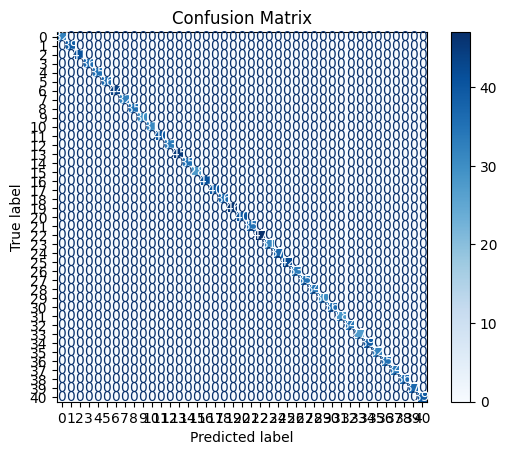

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


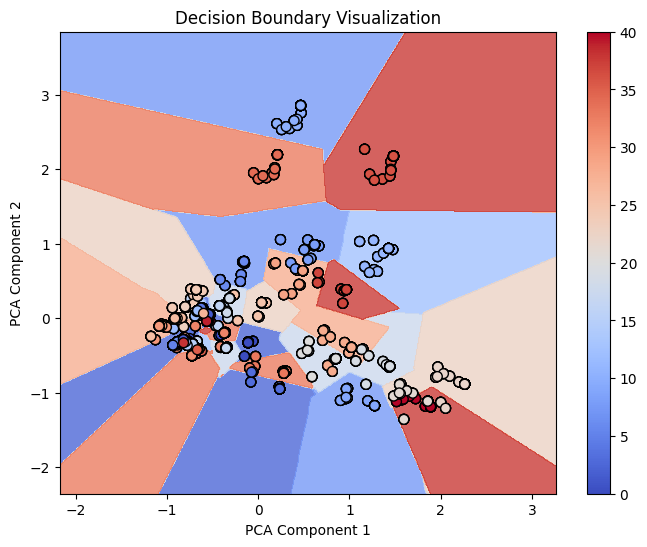

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=20)

# Train the SVC model
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Create a mesh grid for decision boundary plotting
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the labels for each point in the mesh grid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_encoded, edgecolor='k', s=50, cmap=plt.cm.coolwarm)

plt.title('Decision Boundary Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [21]:
import pickle
# pickle.dump(svc,open('models/svc.pkl','wb'))

In [22]:
svc=pickle.load(open("D:\Projects\Mini Project\Chatbot-for-medical-assistance\models\svc.pkl",'rb'))

In [23]:
print("Predicted Label: ",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Label: ",y_test[0])
# print("Predicted Label: ", svc.predict(X_test[0].reshape(1, -1)))
# print("Actual Label: ", y_test[0])


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [24]:
print("Predicted Label: ",svc.predict(X_test.iloc[10].values.reshape(1,-1)))
print("Actual Label: ",y_test[10])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [25]:
precautions=pd.read_csv("D:\Projects\Mini Project\Chatbot-for-medical-assistance\datasets\precautions_df.csv")
workout=pd.read_csv("D:\Projects\Mini Project\Chatbot-for-medical-assistance\datasets\workout_df.csv")
description=pd.read_csv("D:\Projects\Mini Project\Chatbot-for-medical-assistance\datasets\description.csv")
medications=pd.read_csv("D:\Projects\Mini Project\Chatbot-for-medical-assistance\datasets\medications.csv")
diets=pd.read_csv("D:\Projects\Mini Project\Chatbot-for-medical-assistance\datasets\diets.csv")

In [26]:
def helper(dis):
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']
    
    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}


def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [27]:
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)
desc,pre,med,die,wrkout=helper(predicted_disease)
print("=================Predicted disease============")
print(predicted_disease)
print("=================Description==================")
print(desc)
print("=================Precautions==================")

i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================Medication==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================Workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================Diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

=================Predicted disease============
Fungal infection
=================Description==================
Fungal infection is a common skin condition caused by fungi.
=================Precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================Medication==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================Workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================Diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


c:\Softwares\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [28]:
import sklearn
print(sklearn.__version__)

1.3.2


c:\Softwares\Python\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Softwares\Python\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Softwares\Python\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Softwares\Python\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Softwares\Python\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your

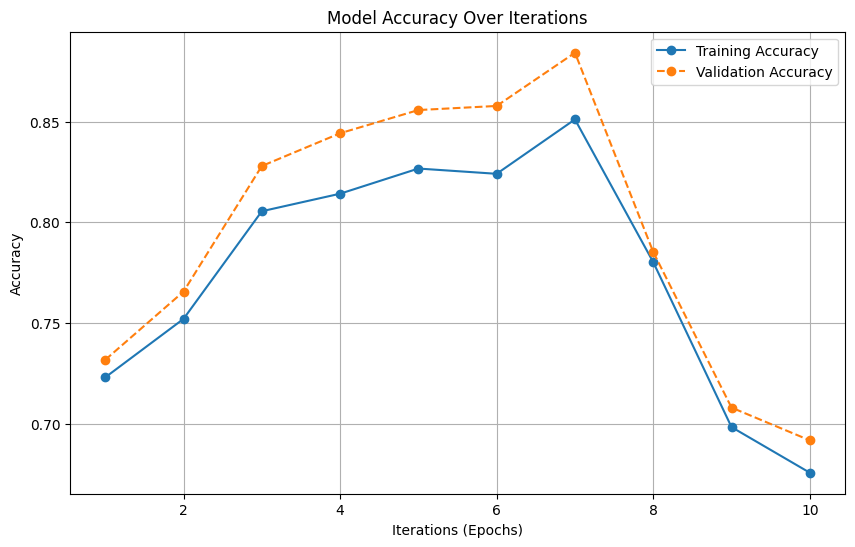

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Simulate training over multiple iterations (epochs)
num_epochs = 10
train_accuracies = []
test_accuracies = []

for epoch in range(1, num_epochs + 1):
    # Train the SVC model for demonstration
    svc = SVC(kernel='linear', max_iter=epoch * 10, random_state=42)  # Simulating epoch effect
    svc.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, svc.predict(X_train))
    test_acc = accuracy_score(y_test, svc.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Validation Accuracy', marker='o', linestyle='--')
plt.title('Model Accuracy Over Iterations')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
